<a href="https://colab.research.google.com/github/Ava100rav/cnn_1k_pill_dataset/blob/main/cnn_on_1k_pill_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

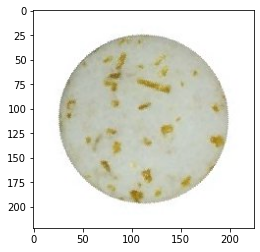

In [3]:
import tensorflow
import cv2 
from keras.preprocessing.image import ImageDataGenerator
plt.imshow(cv2.imread("/content/drive/MyDrive/1k-pill-cnn2/train/pic-2/(1)r30.jpg"))

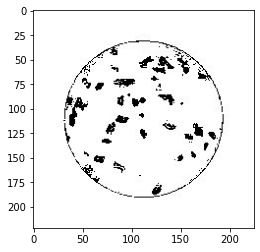

In [4]:
plt.imshow(cv2.imread("/content/drive/MyDrive/1k-pill-cnn2/train/pic-1/(10)outline.jpg"))

In [5]:
#just put image name after dataset/   or copy path directly

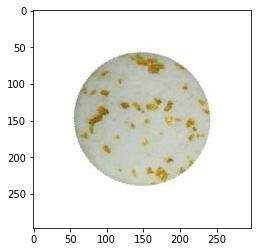

In [6]:
plt.imshow(cv2.imread("/content/drive/MyDrive/1k-pill-cnn2/train/pic-2/(105)r15.jpg"))

initially when downloaded all 1k photos were together in one zip folder ,after extracting name was 1k. 
then i sepearted in 2 folder pic 1, pic 2 under train
and random selected 125 images comprises of both in test

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/1k-pill-cnn2/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/1k-pill-cnn2/test_for_1k", 
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary') 

Found 987 images belonging to 2 classes.
Found 129 images belonging to 2 classes.


In [8]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
model = Sequential()
image_shape = (1000,1000,3)

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 16

train_path='/content/drive/MyDrive/1k-pill-cnn2/train'
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_path='/content/drive/MyDrive/1k-pill-cnn2/test_for_1k'
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)
results = model.fit(train_image_gen,epochs=2, validation_data=test_image_gen,callbacks=[early_stop])

Found 987 images belonging to 2 classes.
Found 129 images belonging to 2 classes.
Epoch 1/2
62/62 [==============================] - 391s 6s/step - loss: 2.5702 - accuracy: 0.9037 - val_loss: 0.0504 - val_accuracy: 0.9922
Epoch 2/2
62/62 [==============================] - 284s 5s/step - loss: 0.0125 - accuracy: 0.9970 - val_loss: 0.0452 - val_accuracy: 0.9922


In [11]:
model.evaluate(test_image_gen)

9/9 [==============================] - 32s 3s/step - loss: 0.0712 - accuracy: 0.9922


[0.0711822509765625, 0.9922480583190918]

In [12]:
pred_probabilities = model.predict_generator(test_image_gen)
pred_probabilities

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[2.0432514e-15],
       [1.6340071e-15],
       [6.4311632e-17],
       [2.7797600e-17],
       [4.5561270e-04],
       [6.3398937e-24],
       [1.4161671e-22],
       [9.9198957e-26],
       [3.8360926e-14],
       [3.1609272e-19],
       [1.2185902e-19],
       [1.4921647e-20],
       [1.4764668e-23],
       [1.2213906e-21],
       [4.3842661e-25],
       [3.0384438e-26],
       [7.6719221e-15],
       [5.1625925e-06],
       [1.7022734e-20],
       [4.8080982e-29],
       [1.8561276e-22],
       [8.9148817e-21],
       [3.3955518e-21],
       [2.1999847e-26],
       [2.9852867e-24],
       [2.9781741e-19],
       [2.2488534e-16],
       [5.5217676e-23],
       [1.6235670e-25],
       [2.1047376e-10],
       [9.9999487e-01],
       [2.3647614e-20],
       [4.0398289e-22],
       [4.0346221e-15],
       [6.8782099e-18],
       [1.0577693e-18],
       [4.8155274e-16],
       [1.4460901e-20],
       [2.6064203e-14],
       [8.0941582e-19],
       [2.8624684e-17],
       [9.999777

In [13]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)